### Linear Polynimial Regression


In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

##### Load the real-world dataset

In [103]:

df = pd.read_csv("./multiple_linear_regression_dataset.csv")


##### Extract features and target variable

In [ ]:

x = df["age"].values  # Feature: age
y = df["income"].values  # Target: income


##### Linear Regression using Normal Equation

In [105]:
# Linear Regression using Normal Equation
def linear_regression(x, y):
    X = np.c_[np.ones(x.shape[0]), x]  # Add bias term
    theta = np.linalg.inv(X.T @ X) @ X.T @ y  # Normal equation
    return theta


##### Train Linear Regression Model

In [106]:

lin_theta = linear_regression(x, y)

##### Predictions for visualization

In [107]:
x_range = np.linspace(min(x), max(x), 100)
y_pred = lin_theta[0] + lin_theta[1] * x_range


##### 3D Plot for Multiple Linear Regression

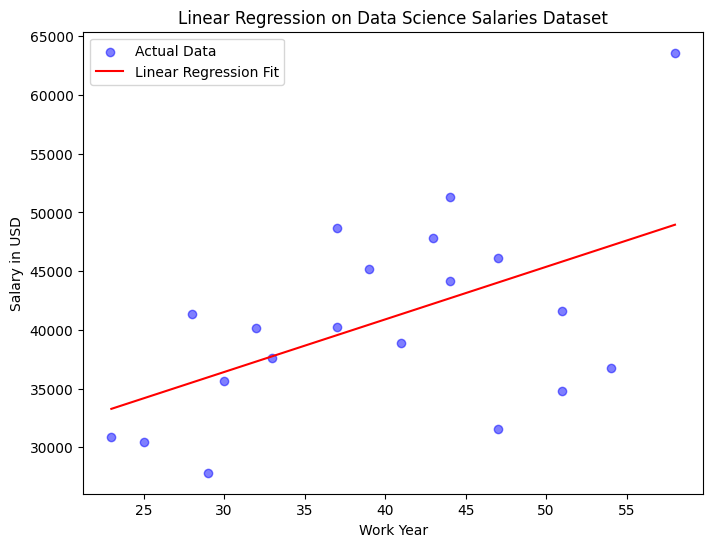

In [108]:
plt.figure(figsize=(8, 6))
plt.scatter(x, y, label="Actual Data", color='blue', alpha=0.5)
plt.plot(x_range, y_pred, label="Linear Regression Fit", color='red')
plt.xlabel("Work Year")
plt.ylabel("Salary in USD")
plt.title("Linear Regression on Data Science Salaries Dataset")
plt.legend()
plt.show()

### --------------------- MULTIPLE LINEAR REGRESSION ---------------------

##### Extract two independent variables for Multiple Linear Regression

In [89]:
X_multi = df[["age", "experience"]].values  # Features: Work year & Remote ratio
y_multi = df["income"].values  # Target: Salary in USD

##### Add bias term (column of ones)


In [90]:
X_multi = np.c_[np.ones(X_multi.shape[0]), X_multi]

##### Compute theta using Normal Equation


In [91]:
theta_multi = np.linalg.inv(X_multi.T @ X_multi) @ X_multi.T @ y_multi


##### Predictions for 3D visualization



In [92]:
y_multi_pred = X_multi @ theta_multi

##### 3D Plot for Multiple Linear Regression


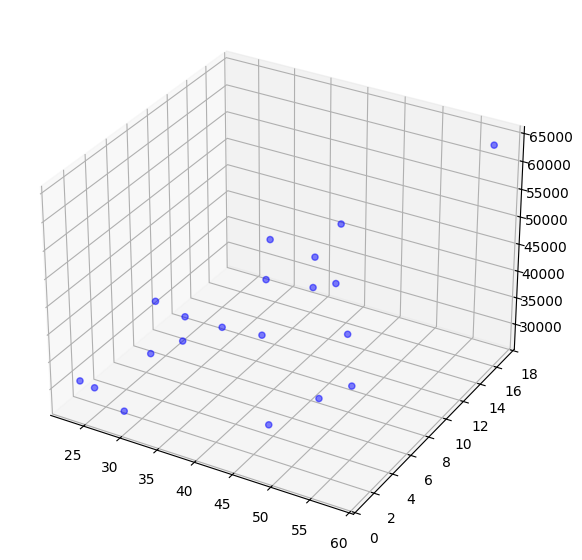

In [94]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df["age"], df["experience"], y_multi, label="Actual Data", color='blue', alpha=0.5)


### --------------------- POLYNOMIAL REGRESSION ---------------------

##### Polynomial Regression (Using Normal Equation)

In [95]:

def polynomial_regression(x, y, degree):
    X_poly = np.vander(x, degree + 1, increasing=True)
    theta = np.linalg.inv(X_poly.T @ X_poly) @ X_poly.T @ y  # Normal equation
    return theta, X_poly


##### Train Polynomial Regression Model

In [96]:
degree = 3
theta_poly, X_poly = polynomial_regression(x, y, degree)


##### Predictions for visualization

In [97]:
y_poly_pred = X_poly @ theta_poly

##### Plot Polynomial Regression Results

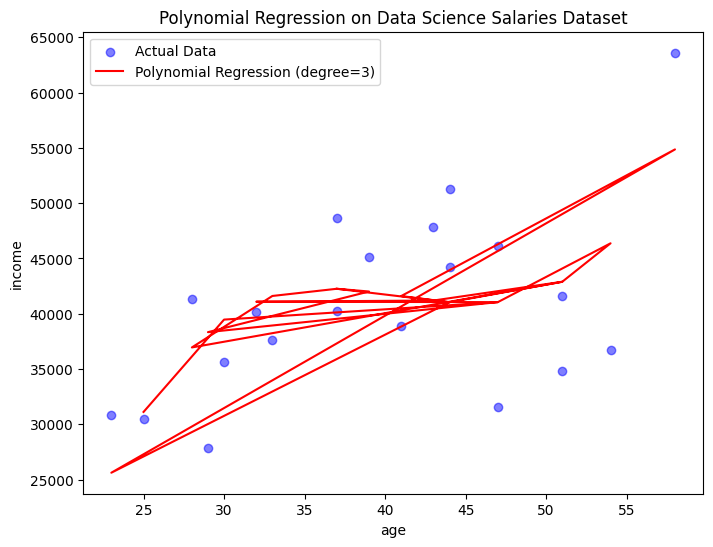

In [98]:
plt.figure(figsize=(8, 6))
plt.scatter(x, y, label="Actual Data", color='blue', alpha=0.5)
plt.plot(x, y_poly_pred, label=f"Polynomial Regression (degree={degree})", color='red')
plt.xlabel("age")
plt.ylabel("income")
plt.title("Polynomial Regression on Data Science Salaries Dataset")
plt.legend()
plt.show()
